In [1]:
import pandas as pd
import json
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from collections import Counter

import re
import numpy as np

#NLTK
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer

#GENSIM
from gensim.models import Phrases

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english')) 
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /Users/shniu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/shniu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/shniu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def text2tokens(text):
    text=text.lower()
    text=re.sub(r"<br\s?\/>", "", text)
    tokens=word_tokenize(text)
    tokens=[t for t in tokens if t not in stop_words and len(t)>3]
    tokens=[lemmatizer.lemmatize(t) for t in tokens]
    tokens=[stemmer.stem(t) for t in tokens]
    return tokens

stop_words = set(stopwords.words('english')) 
df=pd.read_csv("IMDB.csv")

tokens=[]
for index,row in df.iterrows():
    tokens.append(text2tokens(row["review"]))
tokens
df["tokens"]=tokens
df.to_csv("question1.csv", index=False)

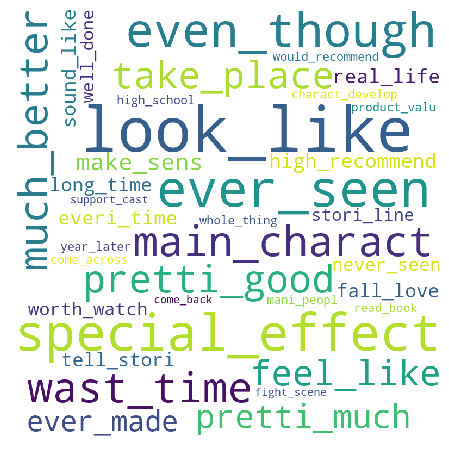

In [23]:
bigram = Phrases(df.tokens, min_count=10, delimiter=b'_')
bigrams=[bigram[d] for d in df["tokens"]]
df["bigrams"]=bigrams

names_list=[]
for tokens in df["bigrams"]:
    names=[t for t in tokens if re.match("[a-z]+_[a-z]+",t)]
    names_list.append(names)
df["bigram_list"]=names_list
df.to_csv("question2.csv", index=False)

words=[]
for sent in df["bigram_list"]:
    words.extend(sent)
words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 20).generate(" ".join(words)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.savefig("question2.png")

In [29]:
word_list=[]
for words in df["bigrams"]:
    word_list.extend(words)
counter=Counter(word_list)
counter=counter.most_common(len(counter))
word_dict=[]
for t,f in counter:
    if len(word_dict)>=300:
        break
    if f<len(df)*0.5 and f>10:
        word_dict.append(t)

def convert_to_vector(words):
    return [words.count(d) for d in word_dict]

vectors=[]
for words in df["bigrams"]:
    vectors.append(convert_to_vector(words))
df["vector"]=vectors

def cosine_sim(a,b):
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

print(df.loc[74]["bigrams"])
vector=convert_to_vector(df.loc[0]["bigrams"])
sim=[]
for v in df["vector"]:
    sim.append(cosine_sim(vector,v))
df["sim"]=sim
sorted_df=df.sort_values(by="sim", ascending=False)
sorted_df=sorted_df.loc[df.sim>0.3]
sorted_df=sorted_df.to_csv("question3.csv", index=False)

['upon', 'view', 'tobe_hooper', 'crocodil', '2000', 'develop', 'great', 'interest', 'college/crocodil', 'nich', 'exploitation/monst', 'genr', 'look_forward', 'wayward', 'produc', 'follow', 'sever', 'sequel', 'delight', 'bonbon', 'camp', 'good', 'wood', 'could', 'bring', 'subtl', 'sens', 'flair', 'digniti', 'remark', 'script', 'write', 'script', 'room', 'full', 'monke', 'creat', 'crocodil', 'special_effect', 'comput', 'need', 'would', 'cast', 'crocki', 'fodder', 'rus', 'meyer', 'breast', 'hoek', 'pector', 'implants.whil', 'tobe_hooper', 'crocki', 'opus', 'referenc', 'movi', 'blood', 'surf', 'chose', 'dish', 'bunch', 'age', 'theme', 'chum', 'bucket', 'movi', 'look', 'past', 'reveng', 'nerd', 'sequel', 'set', 'find', 'allusions/homag', '/rip-off', 'jaw', 'templ', 'doom', 'indiana_jone', 'last', 'crusad', 'convent', 'godzilla', '2000', 'jame_bond', 'movi', 'also', 'find', 'ready-for-tv', 'fade', 'editor', 'gave', 'make_sens', 'stock.i', 'disappoint', 'crock', 'sotto', 'voce', 'tenor', 'sol